---
title: "probability and likelihood"
execute:
  # echo: false
  freeze: auto  # re-render only when source changes
format:
  html:
    code-fold: true
    code-summary: "Show the code"
---

In the bus stop next to where I live, buses arrive on average every 20 minutes. The timing is not exact, due to traffic, weather, or the number of passengers getting on and off.

* Q1: What is the probability that I will have to wait more than 30 minutes for the next bus?
* Q2: Assume now that we don't know the average interval between buses. Given that I waited 15 minutes today, what is the most likely average interval between buses?
* Q3: This week I waited 10, 25, 30, 2, and 20 minutes for the bus on different days. Given this data, what is the most likely average interval between buses?

Before we go about solving these questions, we note that they require of us two different things.

* **Deduction:** In first question we start with a "State of the World" (the model and its parameters), and use that to predict what the data will look like. This is the realm of **probability**.  
* **Induction:** In second and third questions we start with the "Evidence" (the Data), and use it to work backward to the "State of the World." This is the realm of **likelihood**.


In [1]:
#| code-summary: "import libraries"
import numpy as np
import matplotlib.pyplot as plt

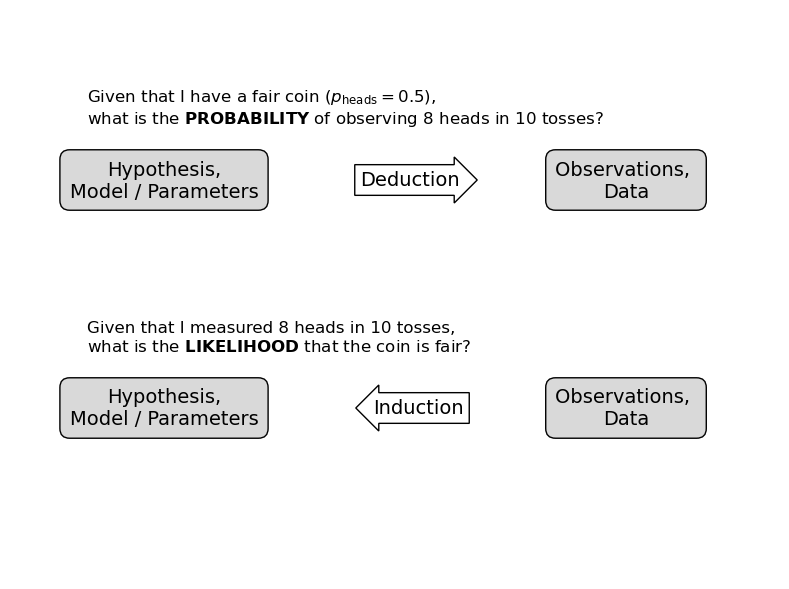

In [2]:
#| code-summary: "plot diagram"
fig, ax = plt.subplots(1, 1, figsize=(8,6), tight_layout=True)

##########################
# deduction
ax.text(0.2, 0.7,
        "Hypothesis,\nModel / Parameters",
        ha="center",
        va="center",
        size=14,
        transform=ax.transData,
        bbox=dict(boxstyle="round", pad=0.5, fc=3*[0.85], ec="k"))

ax.text(0.8, 0.7,
        "Observations, \nData",
        ha="center",
        va="center",
        size=14,
        transform=ax.transData,
        bbox=dict(boxstyle="round", pad=0.5, fc=3*[0.85], ec="k"))

ax.text(0.52, 0.7,
        "Deduction",
        ha="center",
        va="center",
        size=14,
        transform=ax.transData,
        bbox=dict(boxstyle="rarrow", fc="w", ec="k"))

ax.text(
    0.1, 0.8, 
    r"Given that I have a fair coin ($p_\text{heads}=0.5$),"+"\n"
    r"what is the $\mathbf{PROBABILITY}$ of observing 8 heads in 10 tosses?", 
    fontsize=12
)

##########################
# induction
ax.text(0.2, 0.3,
        "Hypothesis,\nModel / Parameters",
        ha="center",
        va="center",
        size=14,
        transform=ax.transData,
        bbox=dict(boxstyle="round", pad=0.5, fc=3*[0.85], ec="k"))

ax.text(0.8, 0.3,
        "Observations, \nData",
        ha="center",
        va="center",
        size=14,
        transform=ax.transData,
        bbox=dict(boxstyle="round", pad=0.5, fc=3*[0.85], ec="k"))

ax.text(0.53, 0.3,
        "Induction",
        ha="center",
        va="center",
        size=14,
        transform=ax.transData,
        bbox=dict(boxstyle="larrow", fc="w", ec="k"))

ax.text(
    0.1, 0.4, 
    r"Given that I measured 8 heads in 10 tosses,"+"\n"
    r"what is the $\mathbf{LIKELIHOOD}$ that the coin is fair?", 
    fontsize=12
)
for spine in ax.spines.values():
        spine.set_visible(False)
ax.set_xticks([])
ax.set_yticks([])
ax.patch.set_visible(False)
ax.set_frame_on(False)

## Q1: deduction and probability

### A slightly different situation

If we knew that buses arrive exactly every 20 minutes, the question would be quite easy to answer. The probability of waiting more than 30 minutes would be zero. The only uncertainty would be when we arrive at the bus stop relative to the bus schedule. We can assume that we arrive uniformly at random between two bus arrivals, so the probability density of us waiting $x$ minutes would look like this:

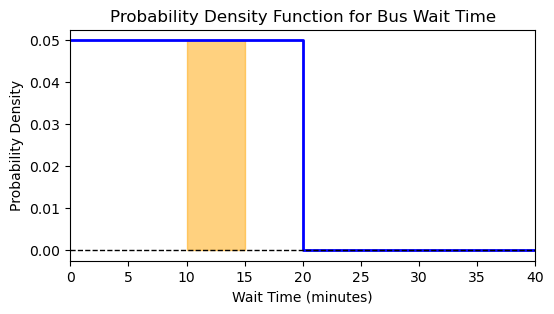

In [3]:
#| code-summary: "plot"
fig, ax = plt.subplots(figsize=(6, 3))
x = np.arange(0,41)
pdf = np.where(x < 20, 1/20, 0)
ax.plot(x, pdf, drawstyle='steps-post', color='blue', lw=2)
ax.plot(x, 0*pdf, color='black', lw=1, ls='--')
ax.fill_between(x, 0, pdf, where=((x>=10) & (x<=15)), color='orange', alpha=0.5, step='post', label='Area = 0.25')
ax.set(title='Probability Density Function for Bus Wait Time',
       xlabel='Wait Time (minutes)',
       ylabel='Probability Density',
       xlim=(0,40));

This is a probability density function (pdf), because the probability that we wait exactly $x$ minutes is zero. Instead, we can calculate the probability that we wait between two times, say between 10 and 15 minutes, by calculating the area under the curve between those two times. The shaded region in the plot above has area $5\times0.05=0.25$, meaning that there is a 25% chance that we will wait between 10 and 15 minutes. It would be impossible to wait more than 20 minutes because the area under the curve after 20 minutes is zero. Of course, if we ask what is the probability that we wait for more than zero minutes, the answer is 1=100%, because logically there is no other option. This tells us that the total area under the curve must be equal to 1, not only for this specific example, but for any valid probability density function.

### now the real situation

Let's contrast the real situation with the simplified one from before:

| 1st case | 2nd case |
|----------|----------|
| Buses arrive **exactly** every 20 minutes. | Buses arrive **on average** every 20 minutes. |
| Uncertainty only in our arrival time. | Uncertainty in both our arrival time and bus arrival times. |
| Every minute that passes I feel more certain that the bus is coming soon. | Every minute that passes, my expected wait time doesn't change! The fact that I already waited 20 minutes doesn't decrease my expected time, the universe doesn't "owe" me a bus just because I've been standing there.|
| I can wait at most 20 minutes. | There is not upper bound, I could wait for a very long time. |
| My expected wait time is 10 minutes. | My expected wait time is 20 minutes. |

I will make the follwing assumption: every minute has the same chance of seeing a bus arrive. No matter how long I already waited, the chance of seeing a bus in the next minute is the same. This is called the **memoryless property**. It means that the bus arrival process has no memory of what happened before. This can be a reasonable assumption for buses arriving randomly, but it would not be reasonable for something like a train schedule, where if I just missed a train, I know I will have to wait a long time for the next one.

What is the probability that I will have to wait more than t minutes?

### full derivation

This is not strictly necessary to understand the rest of the notebook, but I'm a nerd and these derivations are fun. If you don't agree just skip to the final result below.

Let's start by imagining the 20-minute average wait. Instead of looking at the full 20 minutes, let’s slice time into tiny, microscopic intervals of size $\Delta t$ (e.g., one millisecond). In each tiny slice, only two things can happen, either the bus arrives, or it does not. Since the average wait is 20 minutes, the rate $\lambda$ is 1/20 buses per minute. In a tiny slice of time $\Delta t$, the probability p of a bus arriving is $p\approx \lambda \Delta t$.

If I am waiting for the bus at time $t$, it means the bus failed to show up in every single tiny slice of time from $0$ up to $t$.
If each slice is $\Delta t$, the number of slices in time t is $n=t/\Delta t$. The probability of **not** seeing a bus in one slice is $(1−p)$. Therefore, the probability of not seeing a bus in $n$ consecutive slices is:

$$
Pr(T > t) = (1 - p)^n = (1 - \lambda \Delta t)^{t/\Delta t}.
$$

To make this accurate, we want the slices to be "infinitely small" $(\Delta t\rightarrow 0)$. As $\Delta t$ gets smaller, $n$ gets larger. Let's rewrite the exponent to use the definition of e:
$$
Pr(T > t) = \left[(1 - \lambda \Delta t)^{\frac{1}{\lambda \Delta t}}\right]^{\lambda t}.
$$

Recall the fundamental definition of the exponential constant: 

$$
\lim_{x \to 0} (1 - x)^{1/x} = e^{-1}
$$

As $\Delta t \to 0$, the term inside the brackets becomes $e^{-1}$.

$$
Pr(T>t)=e^{-\lambda t}
$$

What we just found is the Survival Function (the chance you are still waiting at time t). To get the Cumulative Distribution Function (CDF)—the chance the bus has arrived by time t:

$$
F(t) = Pr(T \leq t) = 1 - Pr(T > t) = 1 - e^{-\lambda t}
$$

Finally, the Probability Density Function (PDF) is the rate of change (derivative) of the CDF:

\begin{align*}
f(t) &= \frac{d}{dt}F(t) \\
&= \frac{d}{dt}\left(1 - e^{-\lambda t}\right) \\
&= \lambda e^{-\lambda t}
\end{align*}

### the result

Let's remember the question:

Q1: What is the probability that I will have to wait more than 30 minutes for the next bus?

Now that we have the probability density function,

$$
f(t) = \lambda e^{-\lambda t}
$$

we can calculate the probability of waiting more than t minutes as the integral of the PDF from T to infinity:

\begin{align*}
Pr(T > t) &= \int_{t}^{\infty} \lambda e^{-\lambda t} dt\\
&= \left[-e^{-\lambda t}\right]_{t}^{\infty} \\
&= 0 - \left(-e^{-\lambda \cdot t}\right) \\
&= e^{-\lambda \cdot t}
\end{align*}

For our specific case, with an average wait of 20 minutes ($\lambda=1/20$) and $t=30$ minutes:

$$
Pr(T > 30) = e^{-\frac{1}{20} \cdot 30} = e^{-1.5} \approx 0.22.
$$

There is a 22% chance that I will have to wait more than 30 minutes for the next bus. $\square$

## Q2: induction and likelihood

Assume now that we don't know the average interval between buses. Given that I waited 15 minutes today, what is the most likely average interval between buses?

In other words, given a specific observed wait time, what is the most likely value of $\lambda$?

* If $\lambda$ is **very** small, this means that the average interval between buses is very long, say, one a day. In that case, waiting 15 minutes would be quite unlikely, it would be an astonishing stroke of luck.
* If $\lambda$ is **very** large, this means that the average interval between buses is very short, say, one every 10 seconds. In that case, waiting 15 minutes would also be quite unlikely, it would be an astonishing stroke of bad luck.

It is clear from the reasoning above that there is a sweet spot, an intermediate value of $\lambda$ that makes waiting 15 minutes most likely. 

The likelihood is written as:

$$
\mathcal{L}(\lambda \mid t).
$$

It should **not** be read as "the probability of $\lambda$ given t", because $\lambda$ is not a random variable, it's a parameter. Instead, it should be read as "the likelihood of $\lambda$ given t", meaning how plausible is the value of $\lambda$ in light of the observed data t.

For given observed wait time t=15, the likelihood function is equal to the probability density function evaluated at t=15:

$$
\mathcal{L}(\lambda \mid t=15) = P(t=15 \mid \lambda)
$$

Let's vizualize this. On the left plot below we see the PDF for a few different values of $\lambda$. For each curve, I marked the observed wait time of 15 minutes with a circle. It is hard to see which value of $\lambda$ makes waiting 15 minutes most likely just by looking at the left plot.

On the right plot we see the likelihood function for the observed wait time of 15 minutes. Clearly there is a peak for the likelihood.

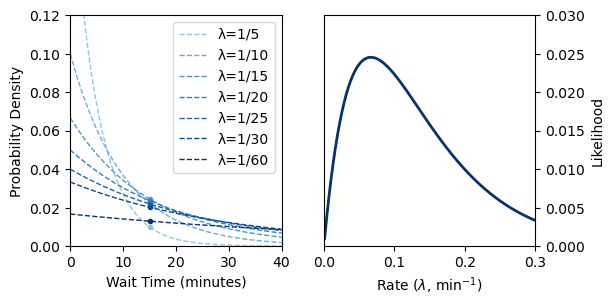

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(6, 3))
t = np.linspace(0,40, 101)
f = lambda t, lam: lam * np.exp(-lam * t)
time = np.array([5, 10, 15, 20, 25, 30, 60])
lam = 1 / time

color_min = 0.4
color_max = 0.99
colors = plt.cm.Blues(np.linspace(color_min, color_max, len(lam)))
for i,l in enumerate(lam):
    ax[0].plot(t, f(t, l), lw=1, ls='--', label=f'λ=1/{time[i]:.0f}', color=colors[i])
    ax[0].plot([15], [f(15, l)], ls=None, marker='o', color=colors[i], markersize=3)
ax[0].legend()
# ax.plot(t, f(t, lam), color='blue', lw=2)
# ax.plot(t, 0*t, color='black', lw=1, ls='--')
ax[0].set(xlabel='Wait Time (minutes)',
       ylabel='Probability Density',
       xlim=(0,40),
       ylim=(0,0.12));

l_array = np.linspace(0.001, 0.3, 100)
t_obs = 15
L = l_array * np.exp(-l_array * t_obs)
ax[1].plot(l_array, L, color=colors[-1], lw=2)
ax[1].set(xlabel=r'Rate ($\lambda$, min$^{-1}$)',
       ylabel='Likelihood',
       xlim=(0,0.3),
       ylim=(0, 0.03)
       );
ax[1].yaxis.tick_right()
ax[1].yaxis.set_label_position("right")

### maximum likelihood

The final step here is obvious. We need to find which lambda maximizes the likelihood function. This value is called the Maximum Likelihood Estimate (MLE) of lambda, denoted $\hat{\lambda}$:

$$
\hat{\lambda} = \underset{\lambda}{\mathrm{argmax}} \ \mathcal{L}(\lambda \mid t=15),
$$

or in English, "the value of lambda that maximizes the argument of the likelihood function, given the observation t=15."

Let's take the derivative of the likelihood function with respect to lambda, set it to zero, and solve for lambda:

\begin{align*}
\mathcal{L}(\lambda \mid t) &= \lambda e^{-\lambda t} \\
\frac{d}{d\lambda} \mathcal{L}(\lambda \mid t) &= e^{-\lambda t} - \lambda t e^{-\lambda t} \\
0 &= e^{-\lambda t} - \lambda t e^{-\lambda t} \\
\lambda t e^{-\lambda t} &= e^{-\lambda t} \\
\lambda t &= 1 \\
\hat{\lambda} &= \frac{1}{t}
\end{align*}

We found that the MLE of lambda given a single observation t is simply the reciprocal of t. In our case, with t=15 minutes, $\hat{\lambda} = 1/15$ buses per minute, meaning that the most likely average interval between buses is 15 minutes. $\square$

### likelihood surface

I find it useful to visualize both the probability and likelihood functions together in a 3D surface plot. When we derived $f(t)$, we wrote it as a function of time, and the parameter $\lambda$ was assumed to be known. The **joint probability distribution** is the same equation, but we now recognize that it is a function of both $t$ and $\lambda$:

$$
f(t, \lambda) = \lambda e^{-\lambda t}.
$$


The joint pdf can be visualized as a surface, representing the exponential distribution's PDF across a range of wait times ($t$) and rate parameters ($\lambda$). The common expression we see when we learn about probability and likelihood is:
$$
\mathcal{L}(\theta \mid x) = P(x \mid \theta),
$$
where $x$ is the data and $\theta$ is the parameter (wait time $t$ and rate $\lambda$ in our example).
At first this seemed baffling to me to define the likelihood function using the same formula as the probability density function. What's the point of having two names for the same formula? I now picture the probability and likelihood functions as slices (projections) of the same surface. Keeping the parameters fixed and varying the data gives us the probability function. Keeping the data fixed and varying the parameters gives us the likelihood function.

This also helps me understand why the likelihood function is not a valid probability distribution over the parameters. For a fixed data point, the area under the likelihood curve over all possible parameter values does not equal 1. Instead, it can take any value, depending on the observed data.

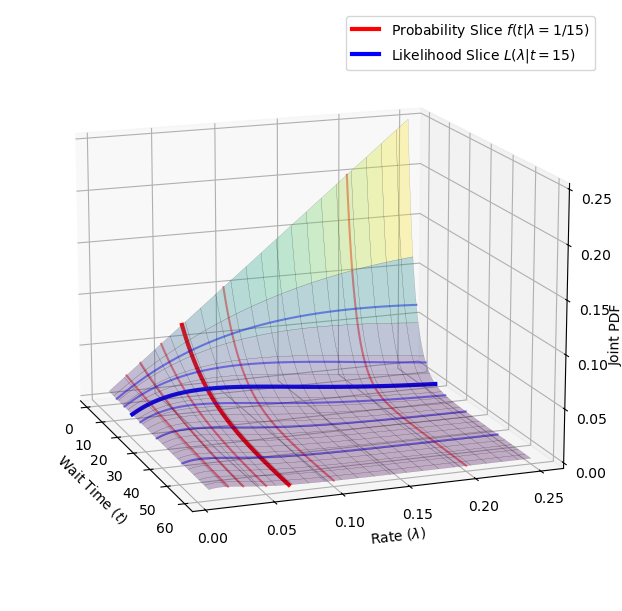

In [6]:
# Define ranges
t = np.linspace(0, 60, 100)
lmbda = np.linspace(1/120, 1/4, 100)
T, L = np.meshgrid(t, lmbda)

# Exponential PDF: f(t; lambda) = lambda * exp(-lambda * t)
joint_pdf = lambda T, L: L * np.exp(-L * T)
Z = joint_pdf(T, L)

# 1. 3D Surface Plot
fig = plt.figure(figsize=(8, 6), constrained_layout=True)
ax = fig.add_subplot(111, projection='3d')
# fig.subplots_adjust(right=0.80)
surf = ax.plot_surface(T, L, Z, cmap='viridis', alpha=0.3, edgecolor='black', linewidth=0.2, rcount=20, ccount=20)

# Highlight slices
fixed_lambda = 1/15
fixed_t = 15

# Probability slice (fixed lambda, varying t)
t_slice = t
z_prob = joint_pdf(t_slice, fixed_lambda)
ax.plot(t_slice, [fixed_lambda]*len(t_slice), z_prob, color='red', lw=3, label=f'Probability Slice $f(t|\lambda=1/15)$')
for lbd_i in [1/5, 1/10, 1/20, 1/30, 1/45]:
    zi = joint_pdf(t_slice, lbd_i)
    ax.plot(t_slice, [lbd_i]*len(t_slice), [zi], color='red', alpha=0.5)

# Likelihood slice (fixed t, varying lambda)
l_slice = lmbda
z_lik = joint_pdf([fixed_t]*len(l_slice), l_slice)
ax.plot([fixed_t]*len(l_slice), l_slice, z_lik, color='blue', lw=3, label=f'Likelihood Slice $L(\lambda|t={fixed_t})$')
for ti in [5, 10, 20, 30, 45]:
    zi = joint_pdf([ti]*len(l_slice), l_slice)
    ax.plot([ti]*len(l_slice), l_slice, [zi], color='blue', alpha=0.5)


ax.set_xlabel('Wait Time ($t$)')
ax.set_ylabel('Rate ($\lambda$)')
ax.set_zlabel('Joint PDF', labelpad=0)
ax.legend()
ax.view_init(elev=15, azim=-20)
# fig.tight_layout()

## Q3: likelihood with multiple observations

This week I waited 10, 25, 30, 2, and 20 minutes for the bus on different days. Given this data, what is the most likely average interval between buses?

We will now make an important assumption: the wait times on different days are independent of each other. This means that the likelihood of observing all the wait times is the product of the individual likelihoods:

$$
\mathcal{L}(\lambda \mid t_1, t_2, \ldots, t_n) = \prod_{i=1}^{n} \mathcal{L}(\lambda \mid t_i) = \prod_{i=1}^{n} P( t_i \mid \lambda).
$$

Given

$$
P(t) = \lambda e^{-\lambda t}
$$

we have

\begin{align*}
\mathcal{L}(\lambda \mid t_1, t_2, \ldots, t_n) &= \prod_{i=1}^{n} \lambda e^{-\lambda t_i} \\
&= \lambda^n e^{-\lambda \sum_{i=1}^{n} t_i}
\end{align*}

Let's take the derivative of the likelihood function with respect to lambda, set it to zero, and solve for lambda:

\begin{align*}
\mathcal{L}(\lambda \mid t_1, t_2, \ldots, t_n) &= \lambda^n e^{-\lambda \sum_{i=1}^{n} t_i} \\
\frac{d}{d\lambda} \mathcal{L}(\lambda \mid t_1, t_2, \ldots, t_n) &= n \lambda^{n-1} e^{-\lambda \sum t_i} - \lambda^n \left(\sum t_i\right) e^{-\lambda \sum t_i} \\
0 &= n \lambda^{n-1} e^{-\lambda \sum t_i} - \lambda^n \left(\sum t_i\right) e^{-\lambda \sum t_i} \\
\lambda^n \left(\sum t_i\right) e^{-\lambda \sum t_i} &= n \lambda^{n-1} e^{-\lambda \sum t_i} \\
\lambda \left(\sum t_i\right) &= n \\
\hat{\lambda} &= \frac{n}{\sum_{i=1}^{n} t_i} \\
\hat{\lambda} &= \frac{1}{\frac{\sum_{i=1}^{n} t_i}{n}} \\
\hat{\lambda} &= \frac{1}{\bar{t}},
\end{align*}

where $\bar{t}$ is the sample mean of the observed wait times. Because the average of 10, 25, 30, 2, and 20 minutes is 17.4 minutes, the MLE of lambda is approximately 1/17.4 buses per minute, quite close to the value 1/20 in the first problem. $\square$

The result is (perhaps) surprisingly simple, certainly compared with the full derivation above. There is something deep to be said about the fact that the formula for the mean naturally emerges from the principle of maximum likelihood. This, and much more, is the subject of the next chapter.